# 🏁 Análise de Corrida de Fórmula 1 com Python
### GP de Abu Dhabi 2021 – Um Estudo de Consistência e Estratégia

Este notebook faz parte do projeto **f1-analyst-with-python**, com foco na análise de dados reais da Fórmula 1 por meio de ferramentas de ciência de dados.

Neste estudo, analisamos o polêmico Grande Prêmio de Abu Dhabi de 2021, com foco nos seguintes pontos:
- Consistência dos pilotos (desvio padrão dos tempos de volta)
- Evolução das posições por volta
- Estratégias de pit stops (em futuras versões)
- Eventos decisivos no decorrer da corrida

Nosso objetivo é oferecer uma visão analítica sobre os momentos-chave que influenciaram o desfecho da corrida.


### Configurações iniciais

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import sys
import os 

plt.style.use('seaborn-v0_8')
sns.set_theme(style='whitegrid')

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

### Carregamento dos Dados

In [2]:
from f1_race_analysis_with_python.config.constantes import RACES_CSV, DRIVERS_CSV, lAP_TIMES_CSV

races = pd.read_csv(RACES_CSV)
drivers = pd.read_csv(DRIVERS_CSV)
lap_times = pd.read_csv(lAP_TIMES_CSV)

### Visualização Inicial dos Dados

In [3]:
display(races.head())
display(drivers.head())
display(lap_times.head())

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


## Consistência dos Pilotos 



### Obejtivo:
Calcular o **desvio padrão dos tempos de volta** de cada piloto durante a corrida, como uma medida de **consistência**. Quanto menor o desvio padrão, mais consistentes foram os tempos de volta do piloto.

In [4]:
from f1_race_analysis_with_python.script.Lap_Times_Consistency import plot_lap_times_consistency

### Vizualização Gráfica da Consistência dos Pilotos no GP de Abu Dhabi 2021

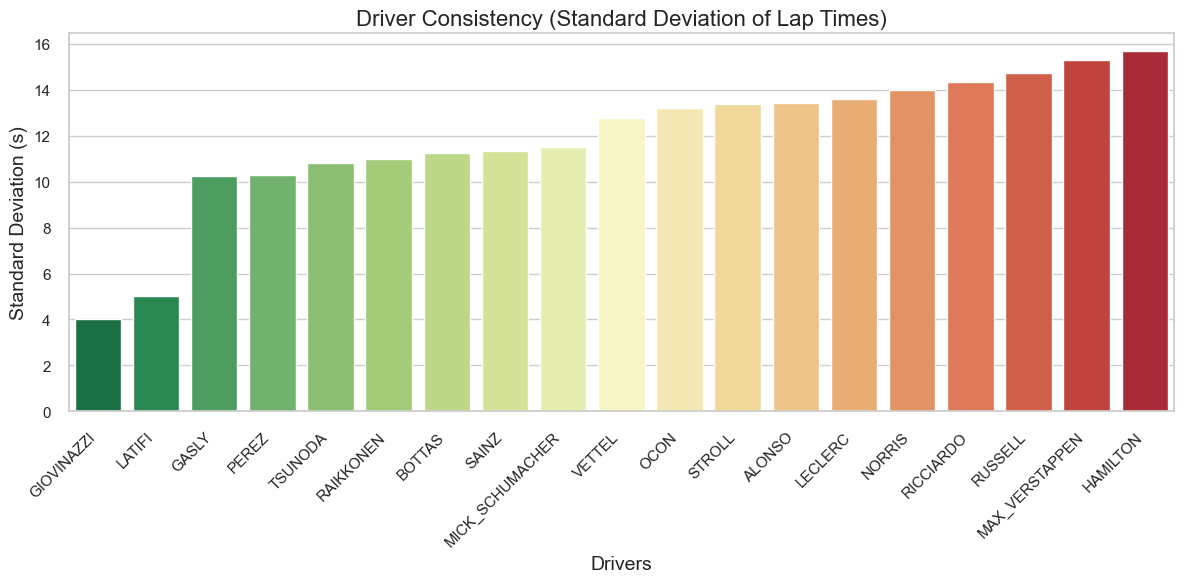

None

In [5]:
consistency_result = plot_lap_times_consistency(lap_times, drivers)
display(consistency_result)

### Interpretação da Consistência

O gráfico acima mostra a consistência dos pilotos ao longo da corrida com base no desvio padrão dos tempos de volta. Quanto menor o valor, mais constante foi o desempenho do piloto.

Destaques:
- **Giovinazzi** apresentou a maior consistência.
- **Hamilton** teve o maior desvio padrão, indicando maior variabilidade, possivelmente influenciado por eventos externos (safety car, estratégia, pneus).
- **Verstappen**, apesar da vitória, teve um desvio relativamente alto, o que pode indicar momentos de tráfego, pneus em diferentes estágios ou variações táticas.


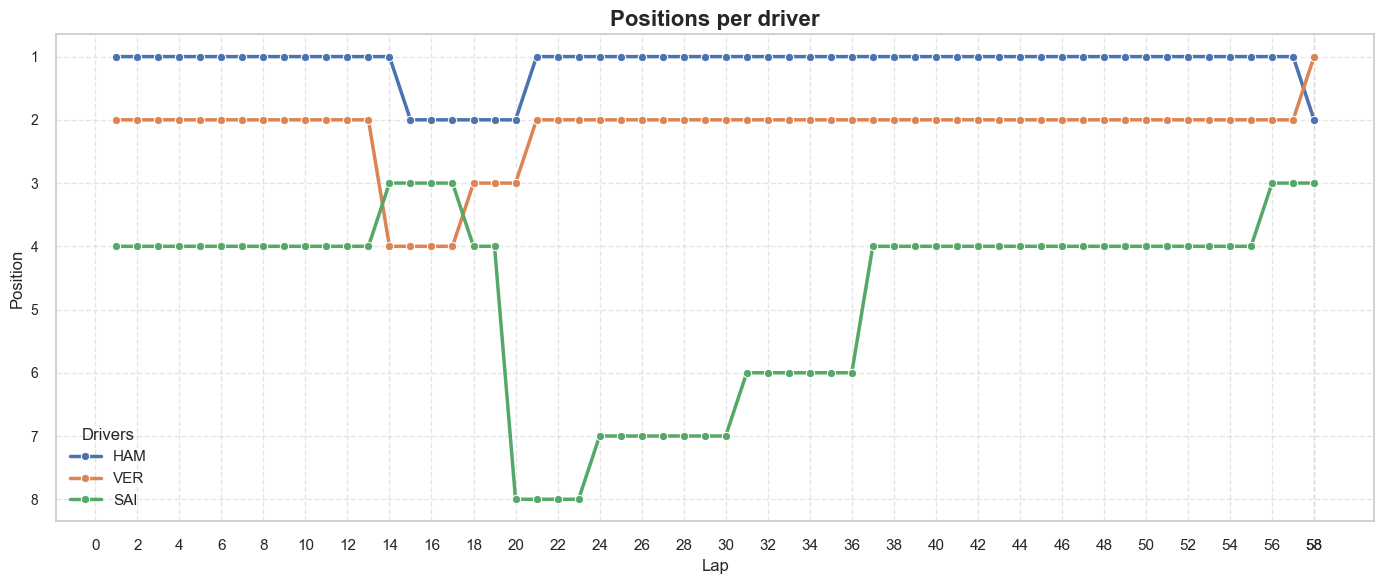

In [6]:
from f1_race_analysis_with_python.script.Drivers_Positions import plot_drivers_positions

plot_drivers_positions(["HAM", "VER", "SAI"])

### Interpretação da Evolução de Posições

Este gráfico mostra a evolução das posições dos três principais pilotos da corrida.

- **Hamilton (HAM)** liderou a maior parte da corrida, até a volta final.
- **Verstappen (VER)** manteve-se em 2º lugar por quase toda a prova, assumindo a liderança na última volta.
- **Sainz (SAI)** teve uma corrida movimentada, oscilando entre as posições do meio do grid até alcançar o pódio.

A inversão de posição entre Hamilton e Verstappen na última volta é o ponto mais controverso da corrida.
